# Report  on the Analysis carried of the PAMAP2 Physical Activity Monitoring Dataset


## Overview


This is an analysis of the PAMAP2 Physical Activity Monitoring dataset, consisting of measurements made by wireless sensors worn by 9 subjects as they performed various physical activities over time. Our goal for this analysis is to build a model that can predict the given task a subject is performing based on a given measurement.

The report is divided into three sections. Section one describes the data preparation, cleaning, and exploration; this section describes how to deal with missing values denoted with 'NAN' as a result of the wireless data dropping. It also discusses Exploratory Data Analysis and visualizing data. Section two focuses on hypothesis formulation and testing using statistical theory. The final section describes model building and validation; it discusses how we applied machine learning algorithms to the data and validated that our model was effective through experiments and statistical tests.

##Problem Statement
Download and process PAMAP2 Physical Activity Monitoring dataset

Perform Exploratory Data Analysis using charts and visualisation and tables to better understand patterns in the dataset

Identify and appropriately deal with a missing value.

Formulate a hypothesis that will help to test the relationship between variables.

Train a regression model that will help to predict heartrates of Subjects who performed various activities

Train a Classifier that will help to predict the classes of activities that the subject participated in whether its vigorous, Medium or Less

## Metrics
Metrics for Regression Model
R-squared The R-squared is a statistical measure that represents the proportion of variance for the dependent variable that can be explained by one or several independent variables in a regression model.

Adjusted R-squared Adjusted R-squared is a modification of the R-squared statistic that has been adjusted for the number of predictors in a regression model. It increases when a new term improves the model more than expected by chance and decreases when one of the predictors has a smaller effect than predicted by chance.

###### Metrics for Classifier
True Positive (TP) is when the model correctly classifies an observation as belonging to the positive class.

True Negative (TN) is when the model correctly classifies an observation as belonging to the positive class

False Positive (FP) is when the model incorrectly classifies the positive class.

False Negative (FN) is when the model incorrectly predicts the negative class.

Accuracy = TP+TN/TP+TN+FP+FN




In [1]:
#importing neccesary manupulative libraries
import numpy as np
import pandas as pd

#Importing some necessary visualisation libraries 
import matplotlib.pyplot as plt

#from pandas_profiling import ProfileReport

import seaborn as sns
from IPython.display import Image
%matplotlib inline

In [2]:
#this section contains the information about the datafiles and the mapping of the columns.
subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

In [3]:
#this section contains the information about the datafiles and the mapping of the columns.
col_names = ["timestamp", "activityID","heartrate"]

IMU_hand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMU_chest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMU_ankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

In [4]:
#Adding columns name together 
columns = col_names + IMU_hand + IMU_chest + IMU_ankle

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


4/1AX4XfWgF3EWnhurOZIADW0lJ8atx0lJO3jBzsyg2lwf5C09iO12IxOMMBME

In [7]:
#importing data set and reading the dataframe in pandas
dataframe1=range(0,54) 
dataframe1 = pd.read_table("/content/drive/My Drive/PAMAP2_Dataset/Protocol/subject101.dat",sep=' ',names=dataframe1)

dataframe2=range(0,54) 
dataframe2=pd.read_table("/content/drive/My Drive/PAMAP2_Dataset/Protocol/subject102.dat",sep=' ',names=dataframe2)

dataframe3=range(0,54) 
dataframe3=pd.read_table("/content/drive/My Drive/PAMAP2_Dataset/Protocol/subject103.dat",sep=' ',names=dataframe3)

dataframe4=range(0,54) 
dataframe4=pd.read_table("/content/drive/My Drive/PAMAP2_Dataset/Protocol/subject104.dat",sep=' ',names=dataframe4)

dataframe5=range(0,54) 
dataframe5=pd.read_table("/content/drive/My Drive/PAMAP2_Dataset/Protocol/subject105.dat",sep=' ',names=dataframe5)

dataframe6=range(0,54) 
dataframe6=pd.read_table("/content/drive/My Drive/PAMAP2_Dataset/Protocol/subject106.dat",sep=' ',names=dataframe6)

dataframe7=range(0,54) 
dataframe7=pd.read_table("/content/drive/My Drive/PAMAP2_Dataset/Protocol/subject107.dat",sep=' ',names=dataframe7)

dataframe8=range(0,54) 
dataframe8=pd.read_table("/content/drive/My Drive/PAMAP2_Dataset/Protocol/subject108.dat",sep=' ',names=dataframe8)

dataframe9=range(0,54) 
dataframe9=pd.read_table("/content/drive/My Drive/PAMAP2_Dataset/Protocol/subject109.dat",sep=' ',names=dataframe9)



# Read external data about Subject and their performance
subjectInformation=pd.read_excel("/content/drive/My Drive/PAMAP2_Dataset/subjectInformation.xlsx")
PerformedActivitiesSummary=pd.read_excel("/content/drive/My Drive/PAMAP2_Dataset/PerformedActivitiesSummary.xlsx")


In [8]:
#creating a list for all subject
list_df_all_subject = [dataframe1, dataframe2, dataframe3,dataframe4,dataframe5,dataframe6,dataframe7, dataframe8, dataframe9]

In [9]:
#comparing the various rows and columns of the subjects
for data in list_df_all_subject:
  print(data.shape)

(376417, 54)
(447000, 54)
(252833, 54)
(329576, 54)
(374783, 54)
(361817, 54)
(313599, 54)
(408031, 54)
(8477, 54)


.

In [10]:
# #  create a column to differentiate the 9 subject
for id, df_subject in enumerate(list_df_all_subject):
  df_subject['subject'] = id + 1

In [11]:
#Adding all our dataframe together
combined_df = dataframe1.append( (dataframe2,dataframe3,dataframe4,dataframe5,dataframe6,dataframe7,dataframe8,dataframe9))

In [12]:
combined_df.subject.value_counts()

2    447000
8    408031
1    376417
5    374783
6    361817
4    329576
7    313599
3    252833
9      8477
Name: subject, dtype: int64

In [13]:
# add subject to column
columns.append('Subject') 

In [14]:
#Adding Colummns title to our dataframe
combined_df.columns = columns

In [15]:
data = combined_df

In [16]:
#Checking the number of rows and columns
data.shape

(2872533, 55)

In [17]:
data.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,Subject
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.0,0.0,0.0,0.0,31.8125,0.238080,9.80003,-1.68896,0.265304,9.81549,-1.41344,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.0,0.0,0.0,0.0,30.3125,9.65918,-1.65569,-0.099797,9.64689,-1.55576,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047758,0.006474,14.8991,-69.2224,-5.82311,1.0,0.0,0.0,0.0,31.8125,0.319530,9.61282,-1.49328,0.234939,9.78539,-1.42846,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.0,0.0,0.0,0.0,30.3125,9.69370,-1.57902,-0.215687,9.61670,-1.61630,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.0,0.0,0.0,0.0,31.8125,0.235593,9.72421,-1.76621,0.173850,9.72528,-1.51894,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.0,0.0,0.0,0.0,30.3125,9.58944,-1.73276,0.092914,9.63173,-1.58605,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.0,0.0,0.0,0.0,31.8125,0.388697,9.53572,-1.72410,0.157969,9.64994,-1.57952,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.0,0.0,0.0,0.0,30.3125,9.58814,-1.77040,0.054545,9.63197,-1.63135,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.0,0.0,0.0,0.0,31.8125,0.315800,9.49908,-1.60914,0.233506,9.57411,-1.44418,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.0,0.0,0.0,0.0,30.3125,9.69771,-1.65625,-0.060809,9.64699,-1.64647,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


In [18]:
#Checking the last 5 rows our data frame
data.tail()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,Subject
8472,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,1.78406,0.087985,0.934673,21.1701,-35.3878,-34.0443,0.558630,-0.593878,0.292228,0.499844,32.375,2.92664,10.21030,-0.983335,3.12563,10.62120,0.642058,-0.034671,-0.222172,-0.191336,15.5991,-40.9116,14.9966,0.625172,-0.760781,-0.039443,-0.169753,31.5,9.38737,-0.565040,-3.27370,9.09401,-0.228554,-2.68770,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,9
8473,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,1.47521,-0.028917,0.806540,20.7931,-34.9954,-34.1772,0.555545,-0.596490,0.299264,0.495995,32.375,2.72281,9.37125,-2.649300,2.83965,9.86963,-1.111460,-0.068015,-0.217669,-0.211320,15.3637,-41.2887,14.0101,0.625592,-0.760751,-0.039538,-0.168312,31.5,9.45875,-1.020820,-3.30873,9.27291,-0.607010,-2.99014,-0.068904,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,9
8474,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,1.29099,-0.155493,0.762446,20.6763,-36.6013,-32.4612,0.553254,-0.598417,0.305463,0.492442,32.375,2.65722,9.07285,-2.262310,2.64813,9.29824,-2.351200,-0.077873,-0.152311,-0.237024,15.8809,-41.4368,14.0146,0.625921,-0.760792,-0.039435,-0.166927,31.5,9.57580,-0.528578,-3.23340,9.43813,-0.697724,-2.99072,-0.070888,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,9
8475,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,1.20794,-0.311214,0.748814,20.5408,-35.8494,-32.3342,0.551068,-0.599876,0.311399,0.489390,32.375,2.61289,8.88341,-2.456100,2.55741,9.02648,-2.139860,0.138759,0.027529,-0.333854,15.6351,-42.2015,14.0172,0.625555,-0.761266,-0.040452,-0.165888,31.5,9.49894,-0.489493,-3.31161,9.49875,-0.576563,-2.87035,0.018961,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029207,9
8476,100.23,0,161.0,25.1875,-4.09726,8.15642,3.29961,-4.73244,8.82870,3.54305,1.40417,-0.396125,0.728581,20.3057,-37.3255,-31.5374,0.548065,-0.601715,0.317869,0.486336,32.375,2.77196,9.22311,-2.260720,2.52647,8.90583,-2.155140,0.250226,0.035799,-0.396232,16.0015,-41.0545,14.1542,0.624731,-0.762119,-0.041858,-0.164721,31.5,9.42169,-0.526345,-3.38935,9.51292,-0.470945,-3.08266,-0.027472,0.011866,-0.042858,-46.2704,4.21475,0.247798,0.598119,0.033685,0.800188,-0.028602,9


In [19]:
data.shape

(2872533, 55)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2872533 entries, 0 to 8476
Data columns (total 55 columns):
 #   Column             Dtype  
---  ------             -----  
 0   timestamp          float64
 1   activityID         int64  
 2   heartrate          float64
 3   handTemperature    float64
 4   handAcc16_1        float64
 5   handAcc16_2        float64
 6   handAcc16_3        float64
 7   handAcc6_1         float64
 8   handAcc6_2         float64
 9   handAcc6_3         float64
 10  handGyro1          float64
 11  handGyro2          float64
 12  handGyro3          float64
 13  handMagne1         float64
 14  handMagne2         float64
 15  handMagne3         float64
 16  handOrientation1   float64
 17  handOrientation2   float64
 18  handOrientation3   float64
 19  handOrientation4   float64
 20  chestTemperature   float64
 21  chestAcc16_1       float64
 22  chestAcc16_2       float64
 23  chestAcc16_3       float64
 24  chestAcc6_1        float64
 25  chestAcc6_2        fl

In [21]:
#Diplaying the total value of empty cell in all columns
print(data.isnull().sum())

timestamp                  0
activityID                 0
heartrate            2610265
handTemperature        13141
handAcc16_1            13141
handAcc16_2            13141
handAcc16_3            13141
handAcc6_1             13141
handAcc6_2             13141
handAcc6_3             13141
handGyro1              13141
handGyro2              13141
handGyro3              13141
handMagne1             13141
handMagne2             13141
handMagne3             13141
handOrientation1       13141
handOrientation2       13141
handOrientation3       13141
handOrientation4       13141
chestTemperature        3563
chestAcc16_1            3563
chestAcc16_2            3563
chestAcc16_3            3563
chestAcc6_1             3563
chestAcc6_2             3563
chestAcc6_3             3563
chestGyro1              3563
chestGyro2              3563
chestGyro3              3563
chestMagne1             3563
chestMagne2             3563
chestMagne3             3563
chestOrientation1       3563
chestOrientati

In [22]:
data.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,Subject
count,2.872533e+06,2.872533e+06,262268.000000,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.868970e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.872533e+06
mean,1.834354e+03,5.466243e+00,109.872508,3.265258e+01,-4.960786e+00,3.587758e+00,3.168417e+00,-4.889420e+00,3.584267e+00,3.349479e+00,-3.704744e-03,3.213540e-02,-6.167531e-03,2.116857e+01,-1.438908e+01,-2.164451e+01,5.665828e-01,-5.637362e-02,-1.387280e-01,-3.253652e-02,3.614974e+01,3.763755e-01,8.512205e+00,-1.518129e+00,2.448624e-01,8.505998e+00,-1.183563e+00,5.538698e-03,8.371162e-03,-2.106222e-02,3.579709e+00,-3.185773e+01,5.516828e+00,5.323223e-01,-4.070343e-01,5.515427e-02,4.855860e-02,3.368513e+01,9.545448e+00,-1.232476e-01,-2.461503e+00,9.521348e+00,-2.062646e-02,-2.039830e+00,8.635143e-03,-3.450122e-02,7.752030e-03,-3.272102e+01,1.593304e+00,1.689044e+01,3.986417e-01,2.154835e-02,3.091533e-01,-1.878725e-02,4.500478e+00
std,1.105689e+03,6.331333e+00,25.870036,1.844274e+00,5.985029e+00,6.277838e+00,3.843923e+00,5.992726e+00,6.055750e+00,3.840650e+00,1.297393e+00,8.870178e-01,1.452335e+00,2.402141e+01,2.409442e+01,2.061562e+01,3.053876e-01,3.780510e-01,3.355073e-01,5.538527e-01,1.585569e+00,1.620532e+00,4.234937e+00,4.173970e+00,1.619479e+00,4.206740e+00,4.188157e+00,4.020286e-01,5.389323e-01,2.924429e-01,1.645178e+01,1.611910e+01,1.992197e+01,2.894888e-01,2.945579e-01,4.763355e-01,3.848282e-01,1.184363e+00,5.711595e+00,6.839350e+00,3.556998e+00,5.346379e+00,6.382194e+00,3.191150e+00,1.073556e+00,5.966026e-01,1.842552e+00,1.887860e+01,2.161181e+01,2.030858e+01,3.034561e-01,5.691302e-01,3.237875e-01,4.731373e-01,2.367003e+00
min,5.640000e+00,0.000000e+00,57.000000,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,-2.813540e+01,-2.221270e+01,-1.669970e+01,-1.039410e+02,-2.000430e+02,-4.976320e+02,-4.522460e-01,-9.999960e-01,-9.982610e-01,-9.993260e-01,3.093750e+01,-3.920340e+01,-4.692460e+01,-8.016680e+01,-3.420400e+01,-4.825720e+01,-6.180410e+01,-1.252510e+01,-8.499900e+00,-7.851890e+00,-7.624520e+01,-1.224800e+02,-6.668470e+01,-2.220890e-01,-9.994670e-01,-9.996350e-01,-8.801950e-01,2.912500e+01,-1.550680e+02,-1.576150e+02,-1.589260e+02,-6.130230e+01,-6.190640e+01,-6.232120e+01,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,-2.536280e-01,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.000000e+00
25%,8.931600e+02,0.000000e+00,90.000000,3.143750e+01,-9.028420e+00,1.290268e+00,9.685817e-01,-8.933270e+00,1.284680e+00,1.164040e+00,-3.477165e-01,-1.970403e-01,-3.011370e-01,5.254000e+00,-2.962280e+01,-3.526602e+01,3.000760e-01,-3.550642e-01,-4.132433e-01,-5.603453e-01,3.512500e+01,-4.201365e-01,7.298863e+00,-3.878680e+00,-5.343240e-0

In [23]:
#The personal Information of subject that perform the experiement
subjectInformation

,Subject ID,Sex,Age (years),Height (cm),Weight (kg),Resting HR (bpm),Max HR (bpm),Dominant hand
0,101,Male,27,182,83,75,193,right
1,102,Female,25,169,78,74,195,right
2,103,Male,31,187,92,68,189,right
3,104,Male,24,194,95,58,196,right
4,105,Male,26,180,73,70,194,right
5,106,Male,26,183,69,60,194,right
6,107,Male,23,173,86,60,197,right
7,108,Male,32,179,87,66,188,left
8,109,Male,31,168,65,54,189,right


In [24]:
PerformedActivitiesSummary.head()

,Activities,ActivitiesID,subject101,subject102,subject103,subject104,subject105,subject106,subject107,subject108,subject109
0,lying,1,271.86,234.29,220.43,230.46,236.98,233.39,256.10,241.64,0.0
1,sitting,2,234.79,223.44,287.60,254.91,268.63,230.40,122.81,229.22,0.0
2,standing,3,217.16,255.75,205.32,247.05,221.31,243.55,257.50,251.59,0.0
3,walking,4,222.52,325.32,290.35,319.31,320.32,257.20,337.19,315.32,0.0
4,running,5,212.64,92.37,0.00,0.00,246.45,228.24,36.91,165.31,0.0


# #Exploratory Data Analysis and Data Cleaning <br>
# Exploratory Data Analysis


Dataset: Physical Activity Monitoring dataset (PAMAP2)

After examining Our Physical Activity Monitoring dataset (PAMAP2)  We observed :


*   55 columns and 2872533 Rows
*   The data frame is separated by sep=' '
*   All 55 columns are numeric: 53 Floats and 2 integers
    The first 5 and last rows were examined with data.head()and data.tail()  respectively
*   The data also contains a lot of null value
    

Dataset: SubjectInformaation<br>
From our SubjectInformaation dataset, we observe that the age ranges of subjects that perform the experient are from 23 to 32 and a total of 8 males and 1 female participated in the experiment. 
The describe() function in pandas gives concise statistics about a data set. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

We observe a notable difference between the mean value and median value for each feature which is denoted by 50%(50th percentile)Likewise the max values and 75th %tile(75 percentile) for all the variables

Based on the table above, most tasks took a similar amount of time, and people performed most of their tasks in the middle of the range. We will want to remember this when we are building our model – it means that Subject 109 does not represent our testing data well.

Dataset: PerformedActivitiesSummary <br>

From the given file PerformedActivitiesSummary we can see that a few data are missing, possibly due to wireless disconnections. Or: The given file indicates that there are not much missing data, possibly due to wireless disconnections.


#Data Cleaning

From the datasets, we can see that some data are missing, possibly due to wireless disconnections. 

We also decided to remove the body orientation measurements, since they were irrelevant and would take too much time for our model to learn. The easiest way to remove the unknown values was an interpolation. We started by removing the irrelevant values and then interpolating between the known values. Interpolation is using known data to estimate unknown data.





In [25]:
#creating a function to deal with transient, non-numeric and missing value
def clean_data(data):
    # The data with value with transient activites are eliminated
    data = data[data['activityID']!=0]
    # The cells with non-numeric value are eliminated
    data = data.apply(pd.to_numeric, errors = 'coerce')
    #  NaN values are removed through interpolation
    data = data.interpolate()
    return data

In [26]:
df_data_cleaned = clean_data(data)

In [27]:

for i in range(4):
    df_data_cleaned["heartrate"].iloc[i]=100
print(df_data_cleaned.isnull().sum())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


timestamp            0
activityID           0
heartrate            0
handTemperature      0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handAcc6_1           0
handAcc6_2           0
handAcc6_3           0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
handOrientation1     0
handOrientation2     0
handOrientation3     0
handOrientation4     0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3

In [28]:
#
df_data_cleaned.reset_index(drop=True,inplace=True)
display(df_data_cleaned.head(15))

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,Subject
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1.0,0.0,0.0,0.0,32.1875,0.124482,9.65003,-1.65181,0.143941,9.71019,-1.47347,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,1.0,0.0,0.0,0.0,30.75,9.73855,-1.84761,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,1
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1.0,0.0,0.0,0.0,32.1875,0.200711,9.64980,-1.65043,0.129092,9.74041,-1.47329,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,1.0,0.0,0.0,0.0,30.75,9.69762,-1.88438,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1.0,0.0,0.0,0.0,32.1875,0.270277,9.72331,-1.88174,0.144685,9.77048,-1.41285,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,1.0,0.0,0.0,0.0,30.75,9.69633,-1.92203,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1.0,0.0,0.0,0.0,32.1875,0.236737,9.72447,-1.72746,0.174402,9.75538,-1.45841,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,1.0,0.0,0.0,0.0,30.75,9.66370,-1.84714,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1.0,0.0,0.0,0.0,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,1.0,0.0,0.0,0.0,30.75,9.77578,-1.88582,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,0.063895,0.007175,0.024701,8.60505,-66.7184,-19.8429,1.0,0.0,0.0,0.0,32.1875,0.271221,9.64826,-1.84275,0.188981,9.72523,-1.50392,-0.002481,-0.018131,-0.045486,1.010820,-50.4054,44.1573,1.0,0.0,0.0,0.0,30.75,9.65780,-1.92147,-0.098161,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1.0,0.0,0.0,0.0,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,0.190837,0.003116,0.038762,9.16003,-66.8578,-19.9665,1.0,0.0,0.0,0.0,32.1875,0.274553,9.61139,-1.72641,0.158971,9.67993,-1.44342,0.024609,-0.022451,-0.033739,1.261700,-50.9669,43.5475,1.0,0.0,0.0,0.0,30.75,9.65839,-1.80756,-0.098862,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1.0,0.0,0.0,0.0,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,0.200328,-0.009266,0.068567,9.47898,-67.3025,-20.6693,1.0,0.0,0.0,0.0,32.1875,0.238925,9.68733,-1.64986,0.173916,9.66480,-1.44355,0.012477,-0.000388,-0.031705,0.355493,-51.1679,44.3915,1.0,0.0,0.0,0.0,30.75,9.65690,-1.88318,-0.136998,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1.0,0.0,0.0,0.0,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [29]:
df_data_cleaned.isnull().sum()

timestamp            0
activityID           0
heartrate            0
handTemperature      0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handAcc6_1           0
handAcc6_2           0
handAcc6_3           0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
handOrientation1     0
handOrientation2     0
handOrientation3     0
handOrientation4     0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3

## Exploratory Visualisation

An open process of creating visualisation is adopted here to understand the data better and perhaps satisfy my curiosity and answer some important research question. 

##### Fig 1 Activity Distribution <br>
The first chart is a bar chart containing 12 bars that represent the various activities that subjects undertake. These 12 major Activities include:

          1.'lying',
          2: 'sitting',
          3: 'standing',
          4: 'walking',
          5: 'running',
          6: 'cycling',
          7: 'Nordic_walking'
          12: 'ascending_stairs',
          13: 'descending_stairs',
          16: 'vacuum_cleaning',
          17: 'ironing',
          24: 'rope_jumping'


The vertical axis of our graph contains the time interval for activity(0.01sec) while the horizontal axis contains the various activities.

##### Fig 2: Heart Rate to Activity Mean <br>
The second chart is a bar chart that compares heart rate on the vertical axis and activity on the horizontal axis

##### Fig 3: Classification of Activities based on Heartrate mean <br>
The third chart is a cat plot that groups heartrate into three classes which are vigorous, medium and low. The heartrate is found on the vertical axis and heartrate_class on the horizontal axis



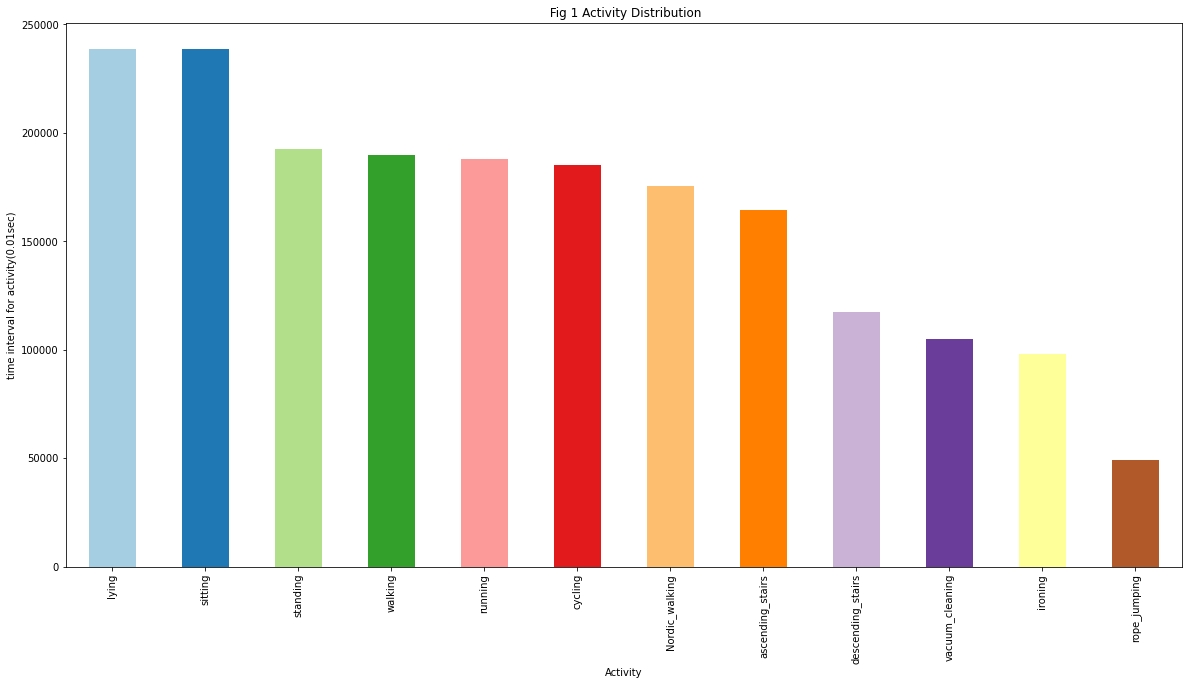

In [33]:
#Fig 1

data_copy = df_data_cleaned
plt.figure( )
# activity distribution
N = len(np.unique(data_copy['activityID']))
xticks = np.arange(12)
xticks_lbl = [activityIDdict[x] for x in  np.unique(data_copy['activityID']).tolist()]
data_copy['activityID'].value_counts().plot(kind="bar", figsize=(20,10), color=plt.cm.Paired(np.arange(N)))
plt.xticks(ticks=xticks,labels=xticks_lbl)
plt.title(" Fig 1 Activity Distribution")
plt.xlabel('Activity')
plt.ylabel("time interval for activity(0.01sec)")
plt.show()

In [ ]:
 data_copy.tail()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,Subject
1942867,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,-0.289166,-0.110170,0.238570,-4.79353,-18.1271,-48.2695,0.823022,-0.256932,0.401650,0.308704,32.375,-0.385331,9.42255,-2.12496,-0.567952,9.48622,-2.05921,-0.147595,-0.137509,0.066513,20.7555,-35.3089,25.0120,0.599802,-0.710880,-0.305108,-0.204444,31.5,9.40727,-2.24401,-2.25974,9.41274,-2.26922,-1.75958,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,0.522929,-0.291612,0.705786,-0.378648,9
1942868,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,-0.275411,-0.128358,0.267409,-4.54101,-18.0169,-48.9268,0.823742,-0.255166,0.401881,0.307947,32.375,-0.273773,9.23341,-2.19977,-0.599929,9.24488,-2.12017,-0.086293,-0.147603,0.048090,20.8878,-34.9263,24.4467,0.600052,-0.711033,-0.304375,-0.204268,31.5,9.36745,-2.28110,-2.33710,9.33733,-2.23908,-1.83495,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,0.522880,-0.291694,0.705895,-0.378450,9
1942869,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,-0.289885,-0.126548,0.281483,-4.17401,-17.9121,-48.4032,0.824497,-0.253507,0.402103,0.307006,32.375,-0.235260,9.38390,-2.19956,-0.464395,9.19919,-2.04556,-0.022543,-0.114693,0.083471,21.1388,-34.8069,24.7298,0.599999,-0.711386,-0.303654,-0.204266,31.5,9.36765,-2.24313,-2.33734,9.32243,-2.23905,-1.80461,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,0.522625,-0.291978,0.706161,-0.378084,9
1942870,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,-0.234417,-0.101485,0.275497,-4.66091,-18.2588,-49.0563,0.824995,-0.252236,0.402400,0.306323,32.375,-0.125392,9.42016,-2.35257,-0.403390,9.27444,-1.98526,-0.017380,-0.116692,0.099091,20.5076,-35.1701,24.3045,0.599876,-0.711817,-0.302845,-0.204330,31.5,9.44470,-2.24425,-2.25936,9.38220,-2.26938,-1.88050,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,0.522536,-0.291955,0.706426,-0.377733,9
1942871,95.10,24,162.0,25.125,5.00812,5.40645,5.02326,4.97362,5.45272,5.14120,-0.260924,-0.093849,0.266205,-5.05008,-17.6169,-48.1408,0.825532,-0.250699,0.402659,0.305797,32.375,-0.195902,9.42170,-2.16025,-0.327697,9.36485,-2.00056,-0.008648,-0.124889,0.099815,20.7609,-35.0506,24.4466,0.599776,-0.712262,-0.301986,-0.204343,31.5,9.44670,-2.28286,-2.18192,9.41250,-2.23905,-1.82022,-0.013310,-0.030195,0.018229,-46.1702,-0.812965,-0.313346,0.522730,-0.291275,0.706526,-0.377800,9


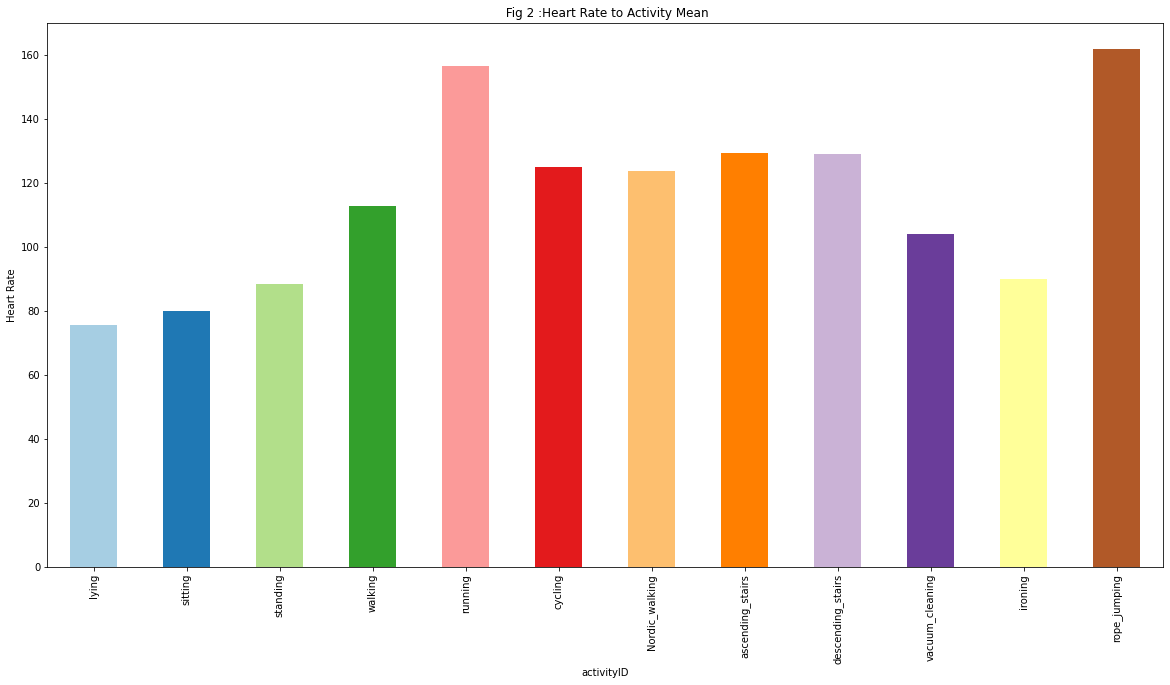

In [32]:
plt.figure()
df_heartrate = df_data_cleaned['heartrate'].groupby(df_data_cleaned['activityID']).mean()
df_heartrate.index = df_heartrate.index.map(activityIDdict)
plt.title(" Fig 2 :Heart Rate to Activity Mean")
plt.xlabel("Activity Name")
plt.ylabel("Heart Rate")
df_heartrate.plot(kind='bar',figsize=(20,10), color=plt.cm.Paired(np.arange(N)))
plt.show()

In [59]:
category=pd.cut(data_copy.heartrate,bins=[0,65,130,202],labels=['low','medium','vigorous'])
data_copy.insert(3,'heartrate_class',category)

#add a new column category next to the age group. 
#category = pd.cut(df.Age,bins=[0,2,17,65,99],labels=['Toddler/baby','Child','Adult','Elderly'])
#df.insert(5,'Age Group',category)

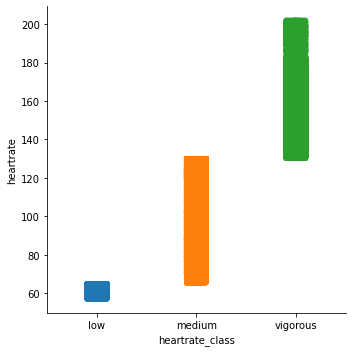

In [35]:
sns.catplot(x="heartrate_class", y="heartrate", data=data_copy)

The Cat Plot Chart above shows the heartrate_class grouping. Most of the subjects who participated in the experiment have their heart rate grouped within three major classes Vigoruse and Medium. The chart also shows that only a few subjects have their heart rate classified as low. This shows that most of the subjects participated in Vigorous activities like rope_jumping and running and medium activities such as descending stairs, ascending stairs, cycling etc but few subjects participated in lying and ironing.



### Classification of Activities based on Heartrate mean
Vigorous exercise includes running, rope jumping swimming, heavy gardening, and playing with children or dogs.

Moderate activity includes ascending stairs, descending stairs, cycling, brisk walking, water aerobics, doubles tennis, biking on level ground, sports involving catch and throw (such as volleyball and baseball), stair-climbing, carrying small children, mopping the floor, scrubbing the bathtub, car washing, and general gardening.

Low activity includes lying, ironing, sitting light walking, stretching, lifting hand weights or push-ups against the walls.







#Hypothesis Testing

In  hypothesis testing, we will use sample data to determine whether or not the effect we are seeing between two variables is due only to a chance 
occurrence.



The null hypothesis (H0) is the “status quo” or “known/accepted fact”. If a statistical test is significant, this means that changes are occurring and we will reject the null hypothesis. <br>


The alternative hypothesis (H1 or Ha): the opposite of the null, and the variable being tested for statistical significance.<br>


Confidence intervals give us an idea of the precision of our results and a range of values that might be associated with the parameter we are estimating.<br>


Critical values are essentially cut-off points that define regions in a distribution where the test statistic is unlikely to lie. <br>

The p value is used in hypothesis testing to help you determine whether to accept or reject the null hypothesis. If the P-value is small, it means that there is strong evidence against the null hypothesis,


If p-value from our hypothesis test is probably higher than our alpha and wewill likely fail to reject our null hypothesis!

# Hypothesis  One

We will be using a 5% α and 95% confidence interval

 α = 0.05 <br>
 Confidence Level % = 1 − α <br>

Null hypothesis (H0): ud = 0, which translates to the mean difference between heartrate and Activities is equal to 0.<br>

H0:μ=μ0,
Alternative hypothesis (HA): ud ≠ 0, which translates to the mean difference between heartrate and Activities is not equal to 0.<br>

HA:μ≠μ0.


Independent Variable : Activities ID 

Dependent Variable : heartrate

# Hypothesis two

Null hypothesis (H0): ud = 0, which translates to the between vigorous heartrate and medium heartrate is equal to 0.<br>

H0:μ=μ0,

Alternative hypothesis (HA): ud ≠ 0, which translates to the mean difference between vigorous heartrate and medium heartrate is not equal to 0.<br>





# Hypothesis three

Null hypothesis (H0): ud = 0, which translates to the mean difference between heartrate and temperature is equal to 0.<br>

H0:μ=μ0,

Alternative hypothesis (HA): ud ≠ 0, which translates to the mean difference between heartrate and temperature is not equal to 0.<br>


Independent Variable : temperature

Dependent Variable : heartrate

HA:μ≠μ0.

# Hypothesis  four


Null hypothesis (H0): ud = 0, which translates to the mean difference between timestamp and Activities is equal to 0.<br>

H0:μ=μ0,


Alternative hypothesis (HA): ud ≠ 0, which translates to the mean difference between timestamp and Activities is not equal to 0.<br>
HA:μ≠μ0.

Independent Variable : timestamp

Dependent Variable : activities



In [36]:
data_copy[['timestamp','heartrate','handTemperature', 'activityID']].describe()

,timestamp,heartrate,handTemperature,activityID
count,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06
mean,1.705202e+03,1.074879e+02,3.275126e+01,8.081830e+00
std,1.093463e+03,2.699215e+01,1.794162e+00,6.174789e+00
min,3.120000e+01,5.700000e+01,2.487500e+01,1.000000e+00
25%,7.445400e+02,8.600000e+01,3.168750e+01,3.000000e+00
50%,1.480330e+03,1.040000e+02,3.312500e+01,6.000000e+00
75%,2.663610e+03,1.240000e+02,3.406250e+01,1.300000e+01
max,4.245680e+03,2.020000e+02,3.550000e+01,2.400000e+01


There are no apparent outliers in the variables. Now we need to check whether the data came from a normal distribution. There are two ways to do this—make a histogram or q-q plot, and/or use a statistical test. Let’s try them all.

#### Hypothesis One : using *A* paired sample t-test

In [37]:
from scipy import stats


In [62]:

stats.norm.sf(1.645)

0.049984905539121376

In [38]:
stats.ttest_rel(data_copy['heartrate'], data_copy['activityID']) 


Ttest_relResult(statistic=3753.7881339501037, pvalue=0.0)


#### Interpretation of the Results (Hypothesis 1)

A paired sample t-test was used to analyze the heart rate and Activities the intention is to test if the hand temperature reading of Subjects has a relationship with the heart rate reading taking. The P-value is less than 0.05 (p ≤ .001). This show that there is a statistically significant difference between the mean showing that we don't accept the null hypothesis but rather accept the alternative hypothesis.




 ##### Hypothesis Two : using Independent t-test

In [48]:
#Creating sample subset

vigorous = data_copy[(data_copy ['heartrate_class'] == 'vigorous')]
medium = data_copy[(data_copy['heartrate_class'] == 'medium')]

#setosa = df[(df['species'] == 'Iris-setosa')]

In [50]:
stats.levene(vigorous['heartrate'], medium['heartrate'])

LeveneResult(statistic=7854.415342509488, pvalue=0.0)

In [51]:
stats.ttest_ind(vigorous['heartrate'], medium['heartrate'])


Ttest_indResult(statistic=1534.0530716597627, pvalue=0.0)

In [39]:
stats.ttest_rel(data_copy['handTemperature'], data_copy['heartrate'])


Ttest_relResult(statistic=-3753.7881339501037, pvalue=0.0)

For this test, an F-statistic and calculated p-value are returned. The p-value is the most important of these – if it is less than or equal to 0.05 (i.e., p < .05), we have evidence that our group variances are significantly different from each other. 

The t-test results are significant--p < .05. Therefore, one can reject the null hypothesis in support of the alternative.

#### Hypothesis Three : Using Independent t-test

#### Interpretation of the Results (Hypothesis 3) <br>
A *paired* sample t-test was used to analyze the heart rate and handtemperature the intention is to test if the hand temperature reading of Subjects has a relationship with the heart rate reading taking. The P-value is less than 0.05 (p ≤ .001). This show that there is a statistically significant difference between the mean showing that we don't accept the null hypothesis but rather accept the alternative hypothesis.


Hypothesis Three : Using Independent t-test

In [54]:
stats.ttest_rel(data_copy['timestamp'], data_copy['activityID'])

Ttest_relResult(statistic=2165.09289417105, pvalue=0.0)

#### Interpretation of the Results (Hypothesis 4)


A paired sample t-test was used to analyze the timestamp and Activities the intention is to test if the timestamp reading of Subjects has a relationship with the heart rate reading taking. The P-value is less than 0.05 (p ≤ .001). This show that there is a statistically significant difference between the mean showing that we don't accept the null hypothesis but rather accept the alternative hypothesis.


### Normality **Test**

A normality test is used to determine if a distribution of data is normal. With a normal distribution, it’s easy to conduct a statistical analysis of the data. However, if a data point is not normally distributed, a non-parametric statistic should be employed.

The histogram of our data does not appear to be normally distributed; some data points fall far from the mean. To test this, one can use the Shapiro-Wilk test for normality. The first value is the W test value, and the second value is the p-value.


In [55]:
stats.shapiro(data_copy['heartrate'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.962921679019928, 0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


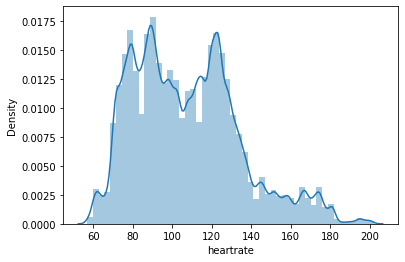

In [56]:
sns.distplot(data_copy['heartrate'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


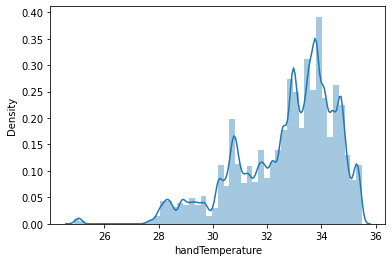

In [57]:
sns.distplot(data_copy['handTemperature'])

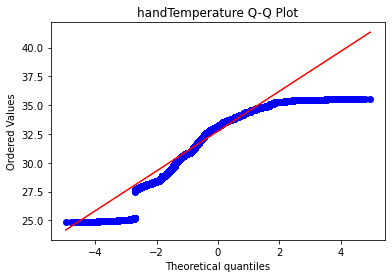

In [58]:
stats.probplot(data_copy['handTemperature'], dist="norm", plot=plt)
plt.title("handTemperature Q-Q Plot")
plt.savefig("handTemperature.png")

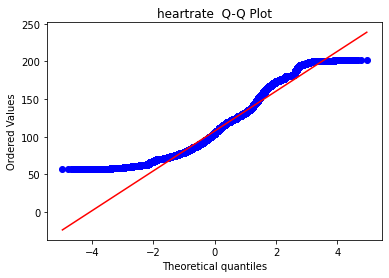

In [60]:
stats.probplot(data_copy['heartrate'], dist="norm", plot=plt)
plt.title("heartrate  Q-Q Plot")
plt.savefig("heartrate.png")

Use QQ-plots to assess data for normality. If points are close to the reference line and within the confidence bands, the normality assumption can be considered as met. The bigger the deviation between the points and the reference line, the less likely that the normality condition is met (p-value).

In [61]:
from scipy import stats
stats.norm.ppf(0.95)

1.6448536269514722

In [69]:

#Checking to see correlation among features
data_copy1.corr()

,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
heartrate,1.000000,-0.395932,-0.298458,0.065728,-0.268278,0.012257,0.059773,-0.001140,0.322611,-0.134859,0.106754,0.064699,-0.026431,-0.138694,0.006791,-0.127371,-0.018564,0.151197,-0.409800,0.007120,0.016387,-0.021720,-0.157438,-0.403923,0.449597,-0.082654,-0.078636,-0.215785,-0.229996,-0.062178,0.283501,0.193728,-0.004164,0.001228,-0.028440,0.001550,-0.325755,-0.247339,-0.056973,0.368458,-0.006638,0.034821,0.148656
handTemperature,-0.395932,1.000000,0.059130,-0.053288,0.077812,-0.025622,-0.023345,-0.001049,-0.096713,-0.024213,-0.022195,-0.100758,-0.012791,-0.011479,-0.035074,0.757514,0.005239,0.034396,0.098116,-0.001823,-0.013415,0.004979,-0.043054,-0.001476,-0.180812,-0.012104,0.068696,0.186805,0.157352,0.495376,-0.062394,-0.047370,-0.041712,-0.000417,0.033085,0.001882,0.092230,0.112293,0.154059,-0.139624,0.071009,-0.050770,0.070556
handAcc16_1,-0.298458,0.059130,1.000000,-0.085483,0.257433,0.020572,-0.094400,0.030422,-0.509092,0.055012,-0.210788,0.176482,-0.101424,0.409012,0.072983,-0.161275,0.020788,-0.424136,0.436363,-0.071869,-0.048675,0.080158,0.248302,0.340194,-0.343251,0.314885,0.193084,0.049081,0.088975,-0.134254,-0.284793,-0.091788,-0.009622,0.038499,-0.072116,0.093352,0.084533,0.206595,-0.042602,-0.072771,0.039628,-0.016375,-0.122905
handAcc16_2,0.065728,-0.053288,-0.085483,1.000000,-0.067639,0.181804,-0.007236,0.018463,-0.043630,-0.430874,0.103437,0.039051,-0.227791,-0.047575,0.075282,-0.054717,0.039300,0.229222,-0.120776,0.060359,0.001573,0.033692,-0.052192,-0.088579,0.055371,0.047207,0.031209,0.002694,0.010212,0.074205,0.048992,0.112923,0.008100,-0.004623,-0.031042,-0.037152,-0.049024,-0.096015,0.041010,0.062664,-0.041182,-0.082739,-0.016261
handAcc16_3,-0.268278,0.077812,0.257433,-0.067639,1.000000,-0.028435,-0.023842,-0.084107,-0.192428,0.145735,-0.506023,0.140820,0.026010,0.173681,0.054761,-0.030131,-0.102546,-0.068293,0.143100,0.008060,-0.058523,0.031157,0.175672,0.199710,-0.136653,0.137799,0.042751,0.084161,0.095976,-0.024140,-0.158171,-0.069671,0.019459,0.012820,-0.011710,0.023692,0.060863,0.108253,-0.011762,-0.069999,0.056968,-0.035975,-0.045253
handGyro1,0.012257,-0.025622,0.020572,0.181804,-0.028435,1.000000,-0.221542,-0.241109,0.000143,-0.022089,0.010955,0.009433,-0.001055,-0.002349,-0.007980,-0.027454,-0.087312,0.022071,0.005090,0.013531,-0.253088,0.187680,-0.009834,-0.003825,0.001986,0.008038,0.016399,-0.008926,0.000526,-0.005045,0.019225,0.012342,-0.011395,0.029073,-0.034873,0.138108,0.012532,-0.066293,-0.000633,0.006511,-0.031013,-0.023796,-0.011275
handGyro2,0.059773,-0.023345,-0.094400,-0.007236,-0.023842,-0.221542,1.000000,0.084683,-0.055527,-0.011302,0.002517,0.012304,-0.011039,0.011299,0.004239,-0.029449,0.055443,0.040296,-0.018234,0.049764,0.262010,-0.149813,-0.011588,-0.027442,0.005677,0.003940,0.000814,-0.010769,-0.013606,-0.021171,0.052257,0.005128,-0.031998,0.049503,0.098756,-0.034400,-0.007820,-0.003256,-0.014572,0.012394,0.010856,-0.011825,0.013312
handGyro3,-0.001140,-0.001049,0.030422,0.018463,-0.084107,-0.241109,0.084683,1.000000,-0.011833,-0.022769,0.004960,-0.001119,-0.019130,-0.002595,0.002446,-0.002575,0.176061,-0.061724,0.014713,-0.097169,0.350246,-0.194888,-0.023618,0.001825,0.007148,-0.002419,-0.000437,-0.000602,-0.009652,-0.005726,-0.023276,0.051688,0.035794,-0.049996,-0.017408,-0.168897,-0.062962,0.128163,0.036106,-0.001706,0.050092,0.047444,0.012988
handMagne1,0.322611,-0.096713,-0.509092,-0.0436

In [64]:
#Features selection for classfication model

col_to_drop_cate = ['handAcc6_1', 'handAcc6_2', 'handAcc6_3' ,
               'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
               'ankleAcc6_1','ankleAcc6_2', 'ankleAcc6_3', 
               'Subject','activityID', 'heartrate'
               ]

In [65]:
 #Features Selection for regression model
 col_to_drop = ['timestamp','handAcc6_1', 'handAcc6_2', 'handAcc6_3' ,
               'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
               'ankleAcc6_1','ankleAcc6_2', 'ankleAcc6_3', 
               'Subject','activityID', 'heartrate_class'
               ]
cols_to_use = [col for col in df_data_cleaned.columns if col not in col_to_drop]

In [66]:
cols_to_use_cate = [col for col in df_data_cleaned.columns if col not in col_to_drop_cate]

In [67]:
data_copy1 = df_data_cleaned[cols_to_use]


In [71]:
data_copy_cate = df_data_cleaned[cols_to_use_cate]

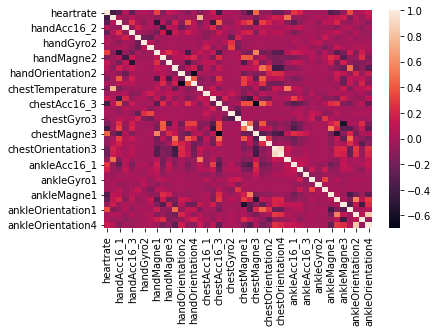

In [70]:
sns.heatmap(data_copy1.corr( ))

In [72]:
data_copy_cate.head()

,timestamp,heartrate_class,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
0,37.66,medium,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1.0,0.0,0.0,0.0,32.1875,0.124482,9.65003,-1.65181,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,1.0,0.0,0.0,0.0,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0
1,37.67,medium,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1.0,0.0,0.0,0.0,32.1875,0.200711,9.64980,-1.65043,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,1.0,0.0,0.0,0.0,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0
2,37.68,medium,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1.0,0.0,0.0,0.0,32.1875,0.270277,9.72331,-1.88174,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,1.0,0.0,0.0,0.0,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0
3,37.69,medium,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1.0,0.0,0.0,0.0,32.1875,0.236737,9.72447,-1.72746,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,1.0,0.0,0.0,0.0,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0
4,37.70,medium,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1.0,0.0,0.0,0.0,32.1875,0.352225,9.72437,-1.68665,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,1.0,0.0,0.0,0.0,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0


In [73]:
# assigning independent and dependent variables for the classifier
X_cate=data_copy_cate.drop('heartrate_class', 1)
y_cate=data_copy_cate.heartrate_class

In [74]:
#assigning independent and dependent variables for regression model
X=data_copy1.drop('heartrate', 1)
y=data_copy1.heartrate


In [76]:
#Checking to see the columns in variables
X.columns
    


Index(['handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3',
       'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2',
       'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestGyro1',
       'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2', 'chestMagne3',
       'chestOrientation1', 'chestOrientation2', 'chestOrientation3',
       'chestOrientation4', 'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2',
       'ankleAcc16_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 'ankleMagne1',
       'ankleMagne2', 'ankleMagne3', 'ankleOrientation1', 'ankleOrientation2',
       'ankleOrientation3', 'ankleOrientation4'],
      dtype='object')

#Model Building 


Machine learning algorithms were applied to this study. For regression, the linear algorithm was used; for classification, the logistics algorithm was used. While each indicator was analyzed independently and ranked by metric, results from indicators reveal that use of the logistics algorithm yielded better results than the application of the linear algorithm.

In statistics, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features'). A form of regression analysis called ordinary least squares computes the unique line that minimizes the sum of squared differences between the true data and that line. Regression analysis is used for prediction and forecasting, where it has substantial overlap with the field of machine learning.

Simple linear regression is a statistical method for modelling the relationship between a scalar response and one explanatory variable. Multivariate linear regression allows for several variables to be used together to predict responses.

Regression analysis models relationships among predictors, or independent variables, and a response variable, or dependent variable. The conditional mean of the response given the values of the predictors is assumed to be an affine function of those values; less commonly, the conditional median or some other quantile is used. Linear regression focuses on the conditional probability distribution of the response given the values of the predictors, rather than on the joint probability distribution of all of these variables.


Logistics Regression
Logistic regression is a statistical analysis used to forecast the probability of a category in a classification problem. Logistic regression models allow for a range of values within a parameter and are most commonly used to predict binary categories (such as true/false, yes/no, and so on).




In [77]:
# spliting the data into Training and Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [78]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [79]:
y_predict= reg.predict(X_test)
y_predict

array([100.01692327,  89.01359134, 145.84828808, ..., 136.40154326,
        88.81076593,  70.95858051])

In [80]:
print(reg.coef_)

[-6.48294991e+00 -4.05542970e-02 -5.49921959e-02 -8.06400920e-01
  1.00424274e-01  1.26844533e+00 -1.35941549e-01  4.58106864e-02
  6.05464189e-03  6.10625363e-04 -1.48079540e+00 -1.38459390e+00
  9.36587095e-02 -9.47083084e-01  2.90468284e+00  4.85459216e-01
 -6.45352390e-02 -5.83377264e-01 -4.89003845e-01 -9.53902901e-01
 -5.40520079e-01  1.58728556e-01 -3.60000287e-01  1.77816608e-01
  7.50156387e-01  4.02732457e+00 -9.08526570e+00  6.57692561e+00
  1.69122330e-01  3.06801109e-01  1.42350724e-01 -2.49444104e-01
 -3.49263093e-01 -5.93465981e-01  1.16566894e-01 -3.56265174e-02
 -6.68493002e-02  5.09748521e-02  1.44954337e+01  2.99731599e+00
  1.53886853e+00  1.07512665e+00]


In [81]:
print(reg.intercept_)


188.77928023222825


In [82]:
#Calculating the R2 value
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.5011517338558318

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_cate, y_cate, test_size=0.3, random_state=123)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [84]:
_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


 
## Model Interpretation
 
###Model 1: Regression Model
Our Linear regression model performed moderately in predicting the heart rate of individuals, we used the R-squared metric to evaluate the model performance and found that our R-squared value is 0.5 which falls within 0.5 < r < 0.7, the value that is generally referred to have a moderate effect size.

###Model 2: Logistic Regression Model
Our Classier performed favourable well with an accuracy of 0.84 0r 84% (84 correct predictions out of 100 total examples). This means your heartrate classifier is doing a good job of correctly identifying classes or heart rates.






##Conclusion
The goal is to create a machine-learning model that will exhibit predictive power with regard to the amount and type of physical activity carried out by a subject, using variables such as heart rate, hand temperature, etc.

The statistical test showed that the mean of variables being compared (features such as hand temperature, heart rate, activity ID) had a high statistical significance.

A regression model and a classifier model were built to predict the heart rate of individuals and heart rate class ie(vigorous, medium and low )with different levels of physical activity. The classification model worked better than the regression model, which had a lower relative accuracy based on the R-square and Accuracy metrics. The R squared was used to measure the Linear regression and For the Logistics Regression Accuracy metrics was applied.

## Recommendations

Data containing missing values was found in our dataset, most likely due to wireless disconnections. We addressed the issue through data cleaning techniques in python.  We can improve our model performance and result with: 
scaling the data to cater for different input ranges using standardization
Training our models with more dataset for better performance 
Also, using other  machine learning and deep learning algorithms this will help to improve the level of accuracy.



In [ ]:
## REFERENCE 

Chatterjee, S., & Hadi, A. S. (2015). Regression analysis by example. John Wiley & Sons.
Reiss, A., & Stricker, D. (2012, June). Introducing a new benchmarked dataset for activity monitoring. <br> In 2012 16th international symposium on wearable computers (pp. 108-109). IEEE.
Sabouri, S., Hajrasouliha, A., Song, Y., & Greene, W. H. (2020). Logistic regression. In Basic Quantitative Research Methods for Urban Planners (pp. 270-304). Routledge.
https://github.com/udacity/machine-learning/blob/master/projects/capstone/report-example-1.pdf
https://www.change4health.gov.hk/en/physical_activity/facts/classification/index.html
https://www.kaggle.com/scratchpad/notebookead1aaa341/edit
https://www.monash.edu/rlo/assignment-samples/engineering/eng-writing-technical-reports/conclusions-and-recommendations
    
